In [1]:
RAW_OUTPUT_FOLDER = "../crawler/ctsv_scraper/output"

In [2]:
cleaned_user_filename = "user_info_deep_cleaned.csv"
cleaned_activity_filename = "activity_info_deep_cleaned.csv"
cleaned_interaction_filename = "user_activity_interaction_deep_cleaned.csv"

In [3]:
import os 

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## User

In [4]:
df_user = pd.read_csv(os.path.join(RAW_OUTPUT_FOLDER, cleaned_user_filename))
df_user.sample(10)

,id,fullName,email,faculty
5695,20184039,Quách Hoàng Anh,anh.qh184039@sis.hust.edu.vn,Trường Công nghệ Thông tin và Truyền thông
20852,20176591,Trần Lê Nhật Linh,linh.tln176591@sis.hust.edu.vn,Trường Cơ khí
14044,20160154,Nguyễn Thế Anh,anh.nt160154@sis.hust.edu.vn,Trường Điện - Điện tử
2113,20185360,Nguyễn Đức Hoàng,hoang.nd185360@sis.hust.edu.vn,Viện Toán ứng dụng và Tin học
14659,20153741,Nguyễn Văn Thưởng,thuong.nv153741@sis.hust.edu.vn,Trường Điện - Điện tử
33704,20205015,Trần Minh Quân,quan.tm205015@sis.hust.edu.vn,Trường Công nghệ Thông tin và Truyền thông
33658,20201457,Trần Hương Giang,giang.th201457@sis.hust.edu.vn,Trường Hóa và Khoa học Sự sống
55634,20238298,NGUYỄN THỊ LÊ VY,vy.ntl238298@sis.hust.edu.vn,Viện Vật lý kỹ thuật
37079,20212392,NGUYỄN LÊ PHÚC VINH,vinh.nlp212392@sis.hust.edu.vn,Trường Điện - Điện tử
40641,20217002,NGUYỄN THÀNH HƯNG,hung.nt217002@sis.hust.edu.vn,Trường Vật liệu


In [5]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59273 entries, 0 to 59272
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        59273 non-null  object
 1   fullName  59273 non-null  object
 2   email     59273 non-null  object
 3   faculty   59262 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [8]:
year_of_start = df_user['id'].apply(lambda x: int(x[:4]))
year_of_start

0        2018
1        2017
2        2019
3        2017
4        2019
         ... 
59268    2023
59269    2023
59270    2023
59271    2023
59272    2023
Name: id, Length: 59273, dtype: int64

In [19]:
year_min, year_max = min(year_of_start), max(year_of_start)
year_max

2023

In [10]:
[year_of_start.count(year) for year in range(year_min, year_max + 1)]

TypeError: Series.count() takes 1 positional argument but 2 were given

In [20]:
year_of_start.value_counts().sort_index().to_list()

[1, 12, 482, 3600, 4534, 5843, 6049, 7127, 7378, 7803, 7418, 9026]

<Axes: >

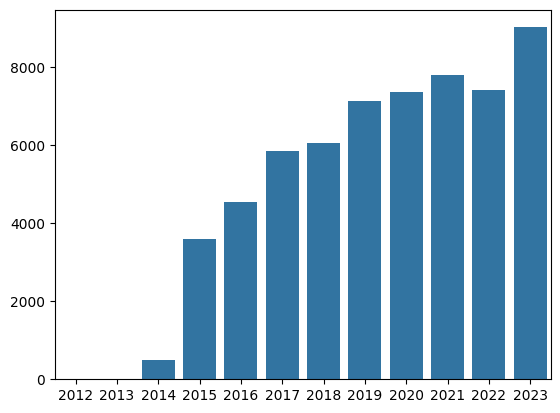

In [18]:
sns.barplot(x=range(2012, 2024), y = year_of_start.value_counts().sort_index().to_list())

In [25]:
df_user.faculty.nunique()

18

In [27]:
df_user.faculty.value_counts()

faculty
Trường Cơ khí                                 13987
Trường Điện - Điện tử                         13482
Trường Hóa và Khoa học Sự sống                 8841
Trường Công nghệ Thông tin và Truyền thông     7565
Viện Kinh tế và Quản lý                        3944
Trường Vật liệu                                2867
Viện Toán ứng dụng và Tin học                  1844
Viện Ngoại ngữ                                 1646
Trường Công nghệ thông tin & Truyền thông      1175
Viện Vật lý Kỹ thuật                           1126
SIE                                             914
Trường Vật Liệu                                 775
Viện Sư phạm Kỹ thuật                           424
Trung tâm Đào tạo liên tục                      315
Viện Vật lý kỹ thuật                            298
Ban CTSV                                         47
Trường Hóa và Khoa học sự sống                    8
Trường Cơ Khí                                     4
Name: count, dtype: int64

## Activity

In [28]:
df_activity = pd.read_csv(os.path.join(RAW_OUTPUT_FOLDER, cleaned_activity_filename))
df_activity.head(10)

,id,title,type,desc,btc,startTime,finishTime,deadlineTime,criteria
0,135,Tọa đàm đối thoại giữa sinh viên và lãnh đạo n...,Sinh hoạt chuyên đề,"Các bạn sinh viên thân mến, Gần đây, Trường ch...",Đại học Bách Khoa Hà Nội,2019-11-26 18:00:00,2019-11-27 21:00:00,2019-11-27 21:00:00,"[{'CGroupId': 0, 'CId': 67, 'CName': 'Tham gia..."
1,136,Ngày hội tuyển dụng của công ty LG Electronics,Hội thảo hướng nghiệp,Công ty LG Electronics Việt Nam Hải Phòng (LGE...,Ban CTSV,2019-11-29 08:30:00,2019-11-29 11:30:00,2019-11-29 11:30:00,"[{'CGroupId': 0, 'CId': 61, 'CName': 'Tham gia..."
2,137,Cổ vũ Giải bóng đá nam sinh viên các trường...,Hoạt động thể thao,Giải bóng đá sinh viên Hà Nội là giải đấu thườ...,Ban CTSV,2019-12-02 08:00:00,2019-12-02 10:30:00,2019-12-02 10:30:00,"[{'CGroupId': 0, 'CId': 62, 'CName': 'Tham gia..."
3,146,"Lễ tổng kết cuộc thi ""Tuổi trẻ học tập và làm ...",Sinh hoạt chuyên đề,- Tiếp tục đẩy mạnh học tập và làm theo tư tưở...,Ban CTSV,2019-12-14 18:00:00,2019-12-14 22:00:00,2019-12-14 22:00:00,"[{'CGroupId': 0, 'CId': 60, 'CName': 'Tham gia..."
4,147,Họp Chi bộ 12/2019,Hiến máu nhân đạo,Kiểm điểm đảng viên Triển khai công tác khác c...,Chi bộ SV II,2019-12-08 17:00:00,2019-12-08 19:30:00,2019-12-08 19:30:00,"[{'CGroupId': 0, 'CId': 55, 'CName': 'Tham gia..."
5,148,Cộng tác viên Đội truyền thông Tư vấn tâm lý,Sinh hoạt chuyên đề,Tổ Tư vấn tâm lý SV (thuộc phòng CTSV) hiện đa...,"Tổ hỗ trợ, tư vấn học tập và tâm lý",2020-04-09 10:00:00,2020-04-09 11:00:00,2020-04-09 11:00:00,"[{'CGroupId': 0, 'CId': 59, 'CName': 'Tham gia..."
6,149,Cộng tác viên tổ Tư vấn và Hỗ trợ SV (Phát tri...,Hỗ trợ tổ chức sự kiện,Tổ Tư vấn và hỗ trợ SV (thuộc phòng CTSV) hiện...,"Tổ hỗ trợ, tư vấn học tập và tâm lý",2020-10-28 15:00:00,2021-03-31 16:00:00,2021-03-31 16:00:00,"[{'CGroupId': 0, 'CId': 59, 'CName': 'Tham gia..."
7,150,Sinh viên ĐH Bách Khoa Hà Nội sôi nổi tham dự ...,Hoạt động văn nghệ,Với chủ đề “Di sản Văn hóa trong quá trình phá...,Tổ Văn Thể Mỹ,2019-11-01 00:00:00,2019-11-26 00:00:00,2019-11-26 00:00:00,"[{'CGroupId': 0, 'CId': 62, 'CName': 'Tham gia..."
8,151,Hội thảo tuyển dụng của công ty Newwing Interc...,Hội thảo hướng nghiệp,Công ty TNHH Newwing Interconnect Technology (...,Ban CTSV,2019-12-13 08:00:00,2019-12-13 12:00:00,2019-12-13 12:00:00,"[{'CGroupId': 0, 'CId': 61, 'CName': 'Tham gia..."
9,152,Hội thảo việc làm Nestlé Career Day,Hội thảo hướng nghiệp,📣📣📣 CHƯƠNG TRÌNH QUẢN TRỊ VIÊN TẬP SỰ NESTLÉ 2...,Ban CTSV,2019-12-16 08:30:00,2019-12-16 11:30:00,2019-12-16 11:30:00,"[{'CGroupId': 0, 'CId': 61, 'CName': 'Tham gia..."


In [29]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4537 entries, 0 to 4536
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            4537 non-null   int64 
 1   title         4537 non-null   object
 2   type          4537 non-null   object
 3   desc          3306 non-null   object
 4   btc           4537 non-null   object
 5   startTime     4537 non-null   object
 6   finishTime    4537 non-null   object
 7   deadlineTime  4537 non-null   object
 8   criteria      4537 non-null   object
dtypes: int64(1), object(8)
memory usage: 319.1+ KB


In [40]:
df_activity.criteria.sample().values

array(["[{'CGroupId': 0, 'CId': 51, 'CName': 'Thành viên CLB học thuật, Lab nghiên cứu, Nhóm nghiên cứu, nhóm Khởi nghiệp', 'CType': 0, 'CMaxPoint': 2.0, 'CStatus': 0}]"],
      dtype=object)

## User-Activity Interaction

In [30]:
df_interaction = pd.read_csv(os.path.join(RAW_OUTPUT_FOLDER, cleaned_interaction_filename))
df_interaction.head(10)

/var/folders/27/sl65zrhj4fj1gnqcggjy0_9c0000gn/T/ipykernel_45436/1756908646.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_interaction = pd.read_csv(os.path.join(RAW_OUTPUT_FOLDER, cleaned_interaction_filename))


,user_id,activity_id,accepted_status
0,20186237,135,2
1,20170351,135,2
2,20191797,135,2
3,20174071,135,1
4,20193457,135,1
5,20174341,135,2
6,20195864,135,1
7,20191875,135,1
8,20182068,135,2
9,20193964,135,1


In [31]:
df_interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287972 entries, 0 to 3287971
Data columns (total 3 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   user_id          object
 1   activity_id      int64 
 2   accepted_status  int64 
dtypes: int64(2), object(1)
memory usage: 75.3+ MB


In [33]:
df_interaction.accepted_status.unique()

array([2, 1, 0])